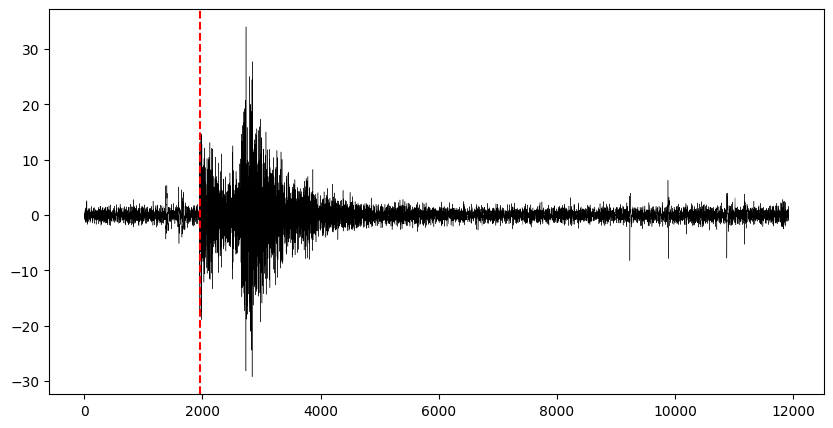

Evento                        10175887_2.5
Estacion                             MNMCX
Catalina?                              NaN
network                                 CX
date           2014-04-10T04:49:48.310000Z
distancia                       144.226434
backazimuth                     188.049782
frame_p                               2359
frame_s                                NaN
lat                                -20.421
lon                                -69.789
Magnitud                               2.5
costero                                NaN
Name: 1053, dtype: object


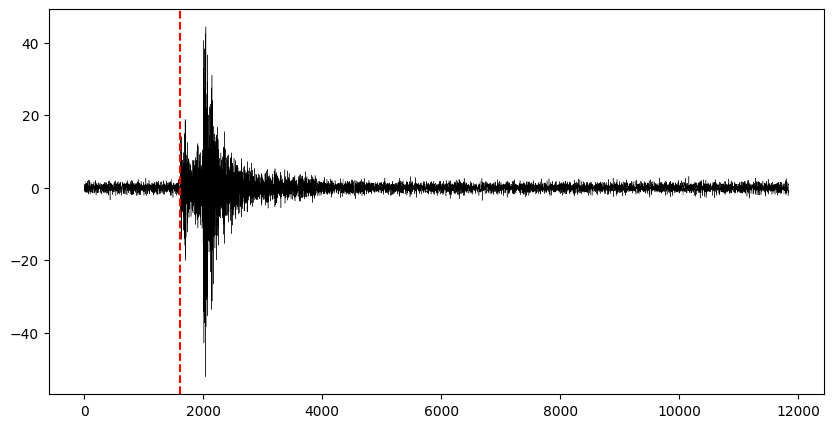

Evento                        10175887_2.5
Estacion                             PATCX
Catalina?                              NaN
network                                 CX
date           2014-04-10T04:49:45.680000Z
distancia                        58.282499
backazimuth                      40.665206
frame_p                               2005
frame_s                                NaN
lat                                -20.421
lon                                -69.789
Magnitud                               2.5
costero                                NaN
Name: 1054, dtype: object


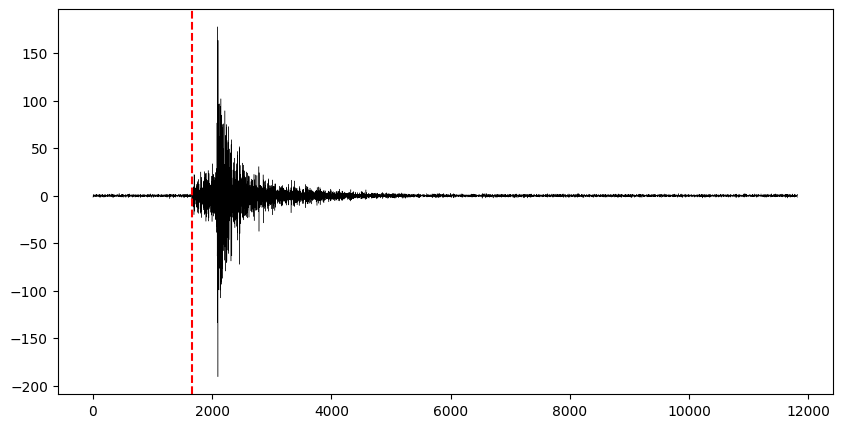

Evento                        10175887_2.5
Estacion                              PB01
Catalina?                              NaN
network                                 CX
date           2014-04-10T04:49:46.388393Z
distancia                        75.710281
backazimuth                     335.432735
frame_p                               2067
frame_s                                NaN
lat                                -20.421
lon                                -69.789
Magnitud                               2.5
costero                                NaN
Name: 1055, dtype: object


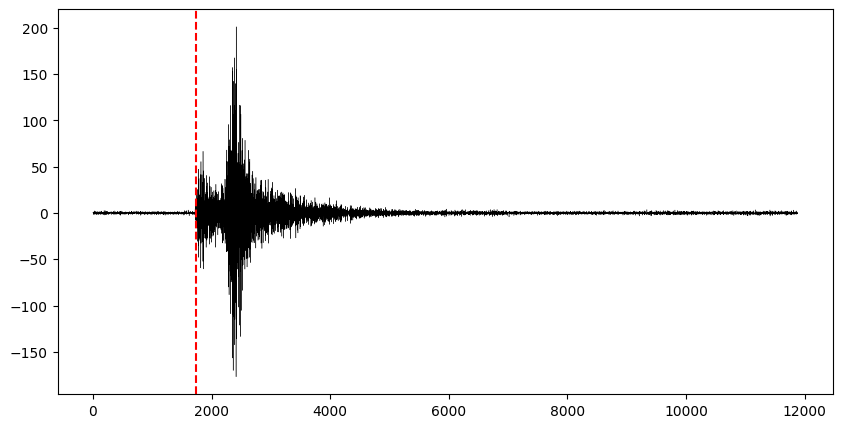

Evento                        10175887_2.5
Estacion                              PB02
Catalina?                              NaN
network                                 CX
date           2014-04-10T04:49:47.968393Z
distancia                       100.120932
backazimuth                       6.404175
frame_p                               2140
frame_s                                NaN
lat                                -20.421
lon                                -69.789
Magnitud                               2.5
costero                                NaN
Name: 1056, dtype: object


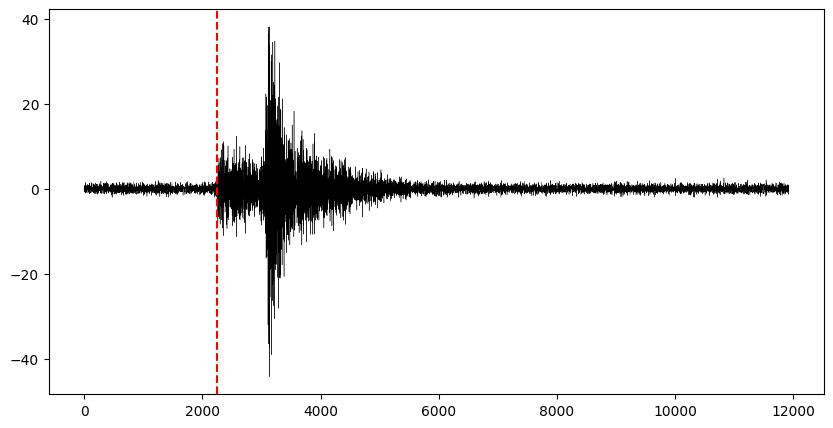

Evento                        10175887_2.5
Estacion                              PB03
Catalina?                              NaN
network                                 CX
date           2014-04-10T04:49:45.598393Z
distancia                       180.235568
backazimuth                     358.808689
frame_p                               2641
frame_s                                NaN
lat                                -20.421
lon                                -69.789
Magnitud                               2.5
costero                                NaN
Name: 1057, dtype: object


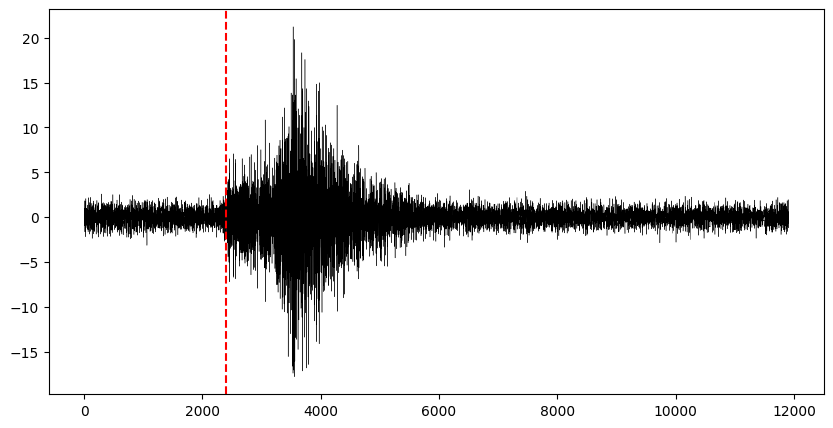

Evento                        10175887_2.5
Estacion                              PB04
Catalina?                              NaN
network                                 CX
date           2014-04-10T04:49:46.108393Z
distancia                       215.046891
backazimuth                      10.069555
frame_p                               2801
frame_s                                NaN
lat                                -20.421
lon                                -69.789
Magnitud                               2.5
costero                                NaN
Name: 1058, dtype: object


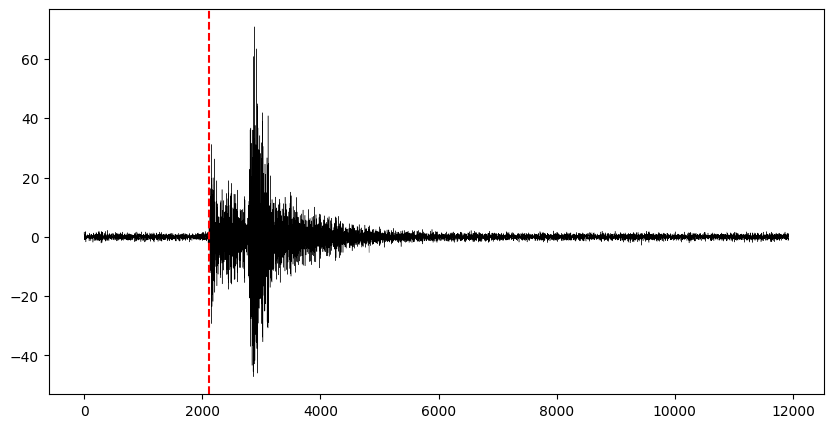

Evento                        10175887_2.5
Estacion                              PB07
Catalina?                              NaN
network                                 CX
date           2014-04-10T04:49:44.308393Z
distancia                       144.916957
backazimuth                        4.01441
frame_p                               2508
frame_s                                NaN
lat                                -20.421
lon                                -69.789
Magnitud                               2.5
costero                                NaN
Name: 1059, dtype: object


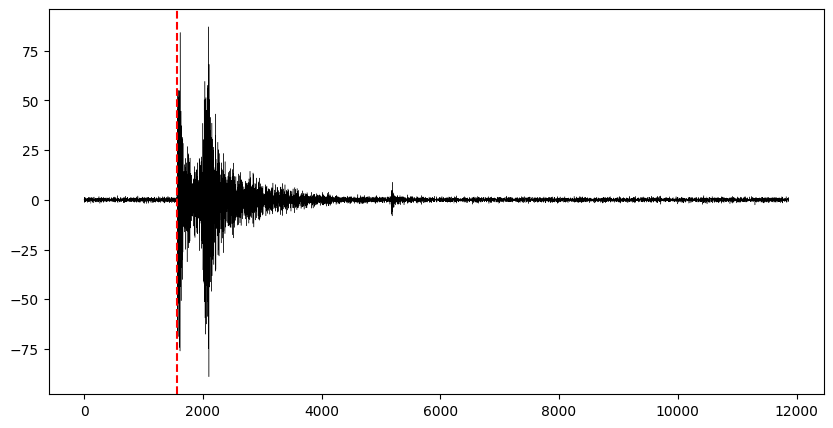

Evento                        10175887_2.5
Estacion                              PB08
Catalina?                              NaN
network                                 CX
date           2014-04-10T04:49:49.388393Z
distancia                        73.269768
backazimuth                      244.87117
frame_p                               1964
frame_s                                NaN
lat                                -20.421
lon                                -69.789
Magnitud                               2.5
costero                                NaN
Name: 1060, dtype: object


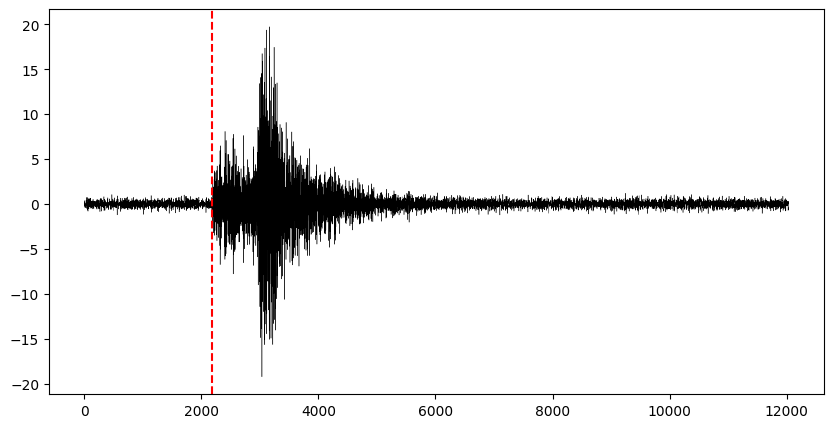

Evento                        10175887_2.5
Estacion                              PB09
Catalina?                              NaN
network                                 CX
date           2014-04-10T04:49:44.660000Z
distancia                       162.543939
backazimuth                     339.432275
frame_p                               2589
frame_s                                NaN
lat                                -20.421
lon                                -69.789
Magnitud                               2.5
costero                                NaN
Name: 1061, dtype: object


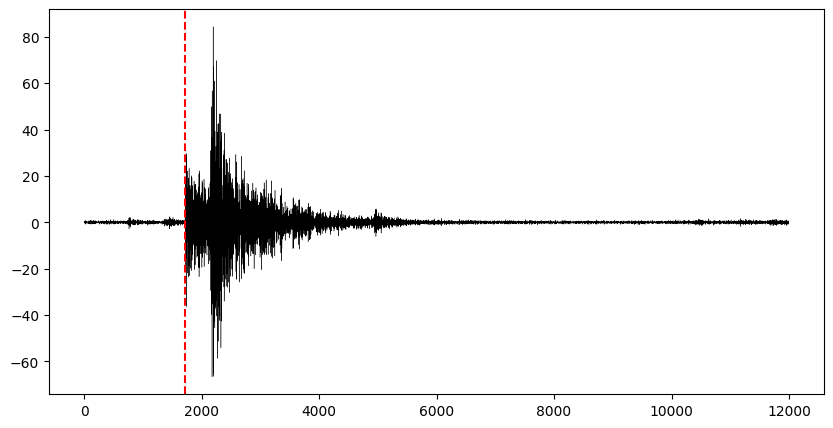

Evento                        10175887_2.5
Estacion                              PB11
Catalina?                              NaN
network                                 CX
date           2014-04-10T04:49:45.170000Z
distancia                        74.381777
backazimuth                     190.771856
frame_p                               2119
frame_s                                NaN
lat                                -20.421
lon                                -69.789
Magnitud                               2.5
costero                                NaN
Name: 1062, dtype: object


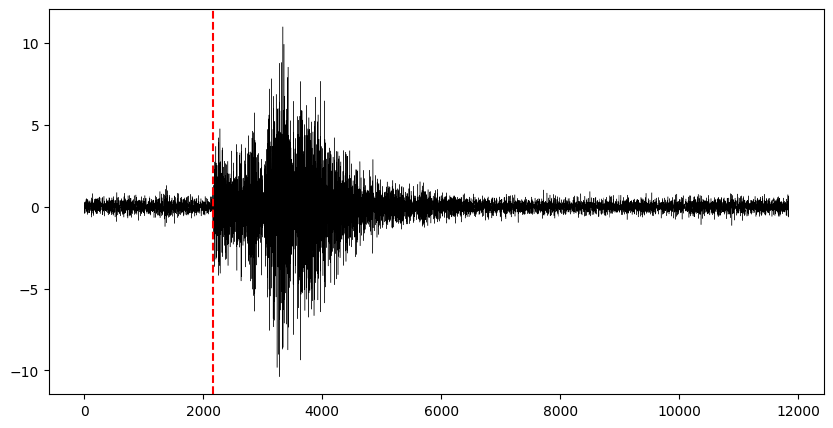

Evento                        10175887_2.5
Estacion                              PB12
Catalina?                              NaN
network                                 CX
date           2014-04-10T04:49:50.240000Z
distancia                       207.869875
backazimuth                     164.293345
frame_p                               2568
frame_s                                NaN
lat                                -20.421
lon                                -69.789
Magnitud                               2.5
costero                                NaN
Name: 1063, dtype: object


In [37]:

import pandas as pd
import scipy as sp
import os
import matplotlib.pyplot as plt

from obspy import read
import json
df = pd.read_csv("./datos_nuevos_1.csv")
def downsample_to40hz(st_channel):
    st_channel[0].data = sp.signal.resample(
        st_channel[0].data, int(len(st_channel[0].data) * 40 / 100)
    )
    st_channel[0].stats.sampling_rate = 40
    return st_channel


i=0
for idx, row in df.iterrows():
    event = row['Evento']
    if event == "10175887_2.5":
        sta = row['Estacion']
        file = os.path.join("../Descarga_menor4", event,f'{sta}/{sta}_*Z.sac')
        st = read(file)
        st_d = downsample_to40hz(st)
        st_d.filter('bandpass',freqmin=1,freqmax=10)
        st_d = st_d.slice(starttime=st_d[0].stats.starttime+10, endtime=st_d[0].stats.endtime)
        plt.figure(figsize=(10, 5))
        plt.plot(st_d[0].data, linewidth=0.3, color="black")  # Assuming arr has shape (1, 440)
        plt.axvline(x=row['frame_p']-10*40, color='r', linestyle='--', label='Frame P')  # Vertical line at frame_p
        
        plt.show()
        print(row)
        i+=1
        if i>10:
            break
    


In [12]:
import pandas as pd
import obspy
from obspy import read
import os
import json
import scipy as sp
DE1 = pd.read_csv("data_m4_p1.csv",delimiter=',') # LISTA COMPLETA Aaron
DE2 = pd.read_csv("data_m4_p2.csv",delimiter=',') # LISTA COMPLETA Jorge
DE3 = pd.read_csv("data_m4_p3.csv",delimiter=',') # LISTA COMPLETA Francisco
DE4 = pd.read_csv("data_m4_p4.csv",delimiter=',') # LISTA COMPLETA Camilo


def downsample_to40hz(st_channel):
    st_channel[0].data = sp.signal.resample(
        st_channel[0].data, int(len(st_channel[0].data) * 40 / 100)
    )
    st_channel[0].stats.sampling_rate = 40
    return st_channel


In [4]:
DE1 = DE1.loc[(DE1['p_wave_frame'].notna()) & (DE1['needs_review'] == False) & (DE1['deleted'] == False)]
DE1 = DE1[DE1['p_wave_frame'].apply(json.loads).apply(len) > 0]

# Then process the p_wave_frame values
DE1['primera_P'] = DE1['p_wave_frame'].apply(json.loads).apply(lambda x: int(x[0]))
DE1

,trace_path,p_wave_frame,needs_review,deleted,primera_P
0,10005551_3.8/AC01,[4442.0],False,False,4442
1,10005551_3.8/AC02,[5193.0],False,False,5193
2,10005551_3.8/GO02,[2844.0],False,False,2844
3,10005551_3.8/PB03,[5122.0],False,False,5122
4,10005551_3.8/PB04,[4789.0],False,False,4789
...,...,...,...,...,...
3124,9992273_2.5/PB08,[5894],False,False,5894
3125,9992273_2.5/PB09,[4324],False,False,4324
3126,9992273_2.5/PB10,[7199],False,False,7199
3127,9992273_2.5/PB11,[6498],False,False,6498


In [5]:
DE2 = DE2.loc[(DE2['p_wave_frame'].notna()) & (DE2['needs_review'] == False) & (DE2['deleted'] == False)]
DE2 = DE2[DE2['p_wave_frame'].apply(json.loads).apply(len) > 0]

# Then process the p_wave_frame values
DE2['primera_P'] = DE2['p_wave_frame'].apply(json.loads).apply(lambda x: int(x[0]))
DE2

,trace_path,p_wave_frame,needs_review,deleted,primera_P
0,10328116_2.1/GO01,[5558.0],False,False,5558
2,10328116_2.1/PATCX,[4543],False,False,4543
3,10328116_2.1/PB01,[4047.0],False,False,4047
4,10328116_2.1/PB02,[3813.0],False,False,3813
5,10328116_2.1/PB03,[4109.0],False,False,4109
...,...,...,...,...,...
994,10552788_2.5/PSGCX,[6123],False,False,6123
998,10553604_2.5/GO01,[6597],False,False,6597
999,10553604_2.5/HMBCX,[5469],False,False,5469
1000,10553604_2.5/MNMCX,[7367],False,False,7367


In [6]:
DE3 = DE3.loc[(DE3['p_wave_frame'].notna()) & (DE3['needs_review'] == False) & (DE3['deleted'] == False)]
DE3['primera_P'] = DE3['p_wave_frame'].apply(lambda x: int(x))
DE3

,trace_path,p_wave_frame,needs_review,deleted,primera_P
0,2014_01_11 13_43_26_M3_7/GO01,5330.0,False,False,5330
1,2014_01_11 13_43_26_M3_7/MNMCX,5625.0,False,False,5625
2,2014_01_11 13_43_26_M3_7/PATCX,3687.0,False,False,3687
3,2014_01_11 13_43_26_M3_7/PB01,4725.0,False,False,4725
4,2014_01_11 13_43_26_M3_7/PB02,4328.0,False,False,4328
...,...,...,...,...,...
2717,2014_08_05 17_13_06_M3_0/PB16,6272.0,False,False,6272
2718,2014_08_05 17_13_06_M3_0/PSGCX,3866.0,False,False,3866
2719,2014_08_05 17_13_06_M3_0/TA01,3401.0,False,False,3401
2724,2014_08_05 21_02_05_M3_1/CO02,3906.0,False,False,3906


In [7]:
DE4 = DE4.loc[(DE4['p_wave_frame'].notna()) & (DE4['needs_review'] == False) & (DE4['deleted'] == False)]
DE4['primera_P'] = DE4['p_wave_frame'].apply(lambda x: int(x))
DE4


,trace_path,p_wave_frame,needs_review,deleted,primera_P
0,2014_09_17 05_13_50_M3_7/GO05,6213.0,False,False,6213
2,2014_09_17 05_13_50_M3_7/MT05,4693.0,False,False,4693
3,2014_09_17 05_13_50_M3_7/MT03,4979.0,False,False,4979
4,2014_09_17 05_13_50_M3_7/VA03,4231.0,False,False,4231
5,2014_09_17 05_13_50_M3_7/CO02,4349.0,False,False,4349
...,...,...,...,...,...
204,2020_06_23 20_19_18_M3_8/CO03,4951.0,False,False,4951
205,2020_06_23 20_19_18_M3_8/GO04,5779.0,False,False,5779
206,2020_06_23 20_19_18_M3_8/MT04,5073.0,False,False,5073
207,2020_06_23 20_19_18_M3_8/MT15,4942.0,False,False,4942


In [8]:
DE = pd.concat([DE1, DE2,DE3,DE4 ],ignore_index=True)
DE


,trace_path,p_wave_frame,needs_review,deleted,primera_P
0,10005551_3.8/AC01,[4442.0],False,False,4442
1,10005551_3.8/AC02,[5193.0],False,False,5193
2,10005551_3.8/GO02,[2844.0],False,False,2844
3,10005551_3.8/PB03,[5122.0],False,False,5122
4,10005551_3.8/PB04,[4789.0],False,False,4789
...,...,...,...,...,...
4446,2020_06_23 20_19_18_M3_8/CO03,4951.0,False,False,4951
4447,2020_06_23 20_19_18_M3_8/GO04,5779.0,False,False,5779
4448,2020_06_23 20_19_18_M3_8/MT04,5073.0,False,False,5073
4449,2020_06_23 20_19_18_M3_8/MT15,4942.0,False,False,4942


In [13]:
events_csv = 'events.csv'
df_events = pd.read_csv(events_csv,delimiter=',')
columnas = ['Evento','Estacion','Catalina?', 'network','date','distancia','backazimuth','frame_p','frame_s', 'lat','lon','Magnitud','costero']
N_DE = pd.DataFrame(columns=columnas)
#%% CREAR CSV PARA ENTRENAR
Coordenadas_estaciones ={'PB09':[-21.7964, -69.2419, 1.530,'CX'],
                         'PB06':[-22.7058, -69.5719, 1.440,'CX'],
                         'AC02':[-26.8355,-69.1291,3.980,'C1'],
                         'CO02':[-31.2037, -71.0003, 1.190,'C1'],
                         'PB14':[-24.6260, -70.4038, 2.630,'CX'],
                         'CO01':[-29.9773,-70.0939,2.157,'C1'],
                         'GO01':[-19.6685,-69.1942,3.809,'C'],
                         'GO03':[-27.5937,-70.2347,0.730,'C'],
                         'PB18':[-17.5895,-69.480, 4.155,'CX'],
                         'MT16':[-33.4285,-70.5234,0.780,'C1'],
                         'AC04':[-28.2046,-71.0739,0.228,'C1'],
                         'AC05':[-28.8364,-70.2738,1.227,'C1'],
                         'AP01':[-18.3708,-70.342,0.031,'C1'],
                         'CO03':[-30.8389,-70.6891,1.003,'C1'],
                         'GO04':[-30.1727,-70.7993,2.076,'C'],
                         'HMBCX':[-20.2782,-69.8879,1.152,'CX'],
                         'MNMCX':[-19.1311,-69.5955,2.304,'CX'],
                         'MT02':[-33.2591,-71.1377,0.323,'C1'],
                         'MT03':[-33.4936,-70.5102,1.087,'C1'],
                         'MT05':[-33.3919,-70.7381,0.765,'C1'],
                         'PATCX':[-20.8207,-70.1529,0.832,'CX'],
                         'PB01':[-21.0432,-69.4874,0.9,'CX'],
                         'PB02':[-21.3197,-69.896,1.015,'CX'],
                         'PB03':[-22.0485,-69.7531,1.46,'CX'],
                         'PB04':[-22.3337,-70.1492,1.52,'CX'],
                         'PB05':[-22.8528,-70.2024,1.15,'CX'],
                         'PB07':[-21.7267,-69.8862,1.57,'CX'],
                         'PB10':[-23.5134,-70.5541,0.25,'CX'],
                         'PB11':[-19.761,-69.6558,1.4,'CX'],
                         'PB12':[-18.6141,-70.3281,0.908,'CX'],
                         'PB15':[-23.2083,-69.4709,1.83,'CX'],
                         'PSGCX':[-19.5972,-70.1231,0.966,'CX'],
                         'TA01':[-20.5656,-70.1807,0.075,'C1'],
                         'TA02':[-20.2705,-70.1311,0.0865,'C1'],
                         'VA03':[-32.7637,-70.5508,1.053,'C1'], 
                         'GO02':[-25.1626,-69.5904,2.550,'C'],
                         'GO05':[-35.0099,-71.9303,0.488,'C'], 
                         'PB16':[-18.3351,-69.5077,4.480,'CX'], 
                         'PB08':[-20.1411,-69.1534,3.060,'CX'],
                         'CO04':[-32.0433,-70.9747,2.401,'C1'],
                         'VA01':[-33.0228,-71.6475,0.0756,'C1'],
                         'AC01':[-26.1479,-70.5987,0.346,'C1'],
                         'CO05':[-29.9186,-71.2384,0.101,'C1'],
                         'CO06':[-30.6738,-71.6350,0.2466,'C1'], 
                         'VA06':[-32.5612,-71.2977,0.080,'C1'],
                         'CO10':[-29.2406,-71.4609,0.035,'C1'], 
                         'BO03': [-34.4961,-71.9612,0.128,'C1'],
                         'AC07':[-27.1297,-70.8602,0.072,'C1'],
                         'PX06':[-23.5115,-70.2495,0.700,'C1'],
                         'MT01':[-33.8641,-71.2509,0.310,'C1'],
                         'MT04':[-33.4664,-70.1362,1.922,'C1'],
                         'MT07':[-32.9759,-71.0156,2.234,'C1'],
                         'MT08':[-33.4052,-70.1334,2.045,'C1'],
                         'MT09':[-33.7762,-70.9887,1.371,'C1'],
                         'MT10':[-33.2728,-70.5372,1.410,'C1'],
                         'MT12':[-33.7327,-70.5487,0.727,'C1'],
                         'MT13':[-33.7435,-70.2861,1.198,'C1'],
                         'VA05':[-33.6571,-71.6143,0.08,'C1'],
                         'BO01':[-34.3917,-71.0848,0.262,'C1'],
                         'BO04':[-33.9888,-70.6090,0.625,'C1'],
                         'MT14':[-33.3957,-70.5362,0.855,'C1'],
                         'MT18':[-33.4631,-70.6644,0.525,'C1'],
                         'MT15':[-33.5994,-70.5063,0.784,'C1'],
                         'BO02':[-34.7924,-70.7814,0.886,'C1']} #Lat,Lon,altura,net
root_folder = "../Descarga_menor4"
nuevas_filas = []
for idx, row in DE.iterrows():
    file = root_folder+'/'+row['trace_path']
    event,sta = row['trace_path'].split('/')
    event_from_df = df_events[df_events['event'] == event]
    net = Coordenadas_estaciones[sta][3]
    lat = event_from_df['lat'].iloc[0]
    lon = event_from_df['lon'].iloc[0]
    mag = event_from_df['mag'].iloc[0]
    dist, azi, bazi = obspy.geodetics.base.gps2dist_azimuth(lat,lon,Coordenadas_estaciones[sta][0], Coordenadas_estaciones[sta][1])  
    dist = dist/1000
    st = read(file+f'/{sta}_*Z.sac')
    frame_p = int(row['primera_P']*0.4)
    st_d = downsample_to40hz(st)
    st_d.filter('bandpass',freqmin=1,freqmax=10)
    st_d = st_d.slice(starttime=st_d[0].stats.starttime+10, endtime=st_d[0].stats.endtime)

    tr = st[0]
    start_time = tr.stats.starttime
    nuevas_filas.append([event,sta,None,net,start_time,dist,bazi,frame_p,None,lat,lon,mag,None])
    
N_DE = pd.DataFrame(nuevas_filas, columns=columnas)
N_DE.to_csv('datos_nuevos_1.csv', index=False, sep=',') 
